**INTRODUCTION**


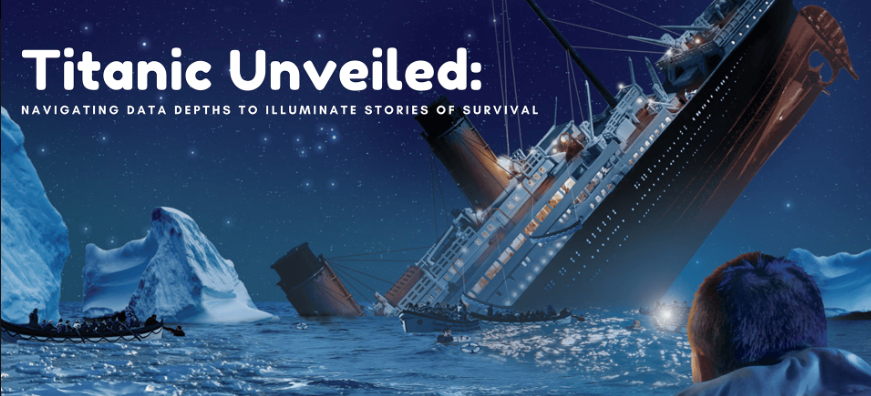


**Overview of Predictive Analytics and Machine Learning:**
Predictive analytics and machine learning—sounds confusing, right? Well, that's because they are. Predictive analytics involves using historical data to predict future events. It's like having a crystal ball, but with math and data instead of magic. Machine learning, on the other hand, is the cool cousin of predictive analytics. It enables computers to learn from data without explicitly being programmed. It is like teaching the dog new tricks, but without the treats and the wagging tail.

Why are these technologies so important to the business world?

Becauuse, they help companies make informed decisions. Instead of relying on gut feelings or the infamous "we've always done it this way" approach, businesses can use data to predict future trends, streamline operations, and stay ahead of the competition.

**Business Problem or Scenario:**
For this assignment, I’ve chosen the ever-popular Titanic dataset from Kaggle. The task at hand? Predicting who survived the infamous shipwreck. Sure, it’s not the most modern business problem, but what if we can predict survival in one of the most chaotic disasters in history, imagine what we can do for customer retention or sales forecasting. The dataset includes various passenger details such as age, gender, ticket class, and more. By analyzing these factors, we aim to build models that can accurately predict survival. In a business context, this translates to understanding customer behavior and making informed decisions based on data. So, grab your life vest and let us dive into the data!

**2. Problem Formulation**
Let’s cut to the chase. The problem we are tackling is predicting who survived the Titanic disaster. We are definitely not trying to rewrite history or save Jack this time around :-). Instead, we are using data from passenger's details—like age, gender, ticket class, and whether they had the misfortune of being in third class or the privilege of being in first class—to predict survival outcomes. The objective? To build a model that can take one look at a passenger's data and predict whether they made it or not. In business context, it is synonymous to predicting which customers are going to stick around and which ones are going to jump ship.

**Importance in a Business Context:**
Why should we care about solving this problem, especially considering the ship sank over a century ago? Well, let us compare it to today's cutthroat business world. Just like the Titanic's passengers, customers in the business world are constantly making decisions about whether to stay with a company or switch to a competitor. High churn rates—where customers leave in droves—can sink a business faster than an iceberg sinks a ship. By predicting who's likely to leave, companies can intervene early, offer incentives, improve customer satisfaction, and keep their clientele afloat.

In practical terms, this means more stable revenue streams, better customer relationships, and a competitive edge. So, while we may not be able to save everyone on the Titanic, we can certainly use this exercise to help businesses keep their metaphorical boats afloat. It is all about leveraging data to stay one step ahead of disaster and ensuring that the business story does not end up like the Titanic's—lost at sea.


**3. Data Collection and Preparation (350 words)**
**Data Collection:**
So, where does the precious Titanic data come from? No, I did not dive into the Atlantic with a waterproof laptop. I sourced the data from Kaggle, the ultimate playground for data enthusiasts. It is an online repository where you can find datasets on everything from housing prices to, you guessed it, the Titanic. The dataset includes a variety of passenger details: demographics (like age and gender), socio-economic status (reflected by ticket class), and even information about the family of the passenger like number of siblings/spouses and parents/children aboard.

**Why Google Colab?**
You might be wondering why I'm using Google Colab for this project. Well, Google Colab is a fantastic tool for data science and machine learning. It is free, it is in the cloud (so no worries about my laptop catching fire from running too many models), and it comes pre-loaded with a ton of libraries that we will need. Plus, it is perfect for collaboration, that allows me to showcase my masterpiece with a click. It feels like having a super-powered, cloud-based notebook that is ready for all my data adventures. Oh, and did I mention it provides a virtual machine with access to powerful hardware like GPUs? Yes, it does. This means I can even run complex models without melting my local machine.

**Mounting the Drive and Importing the Dataset:**
First, we need to mount Google Drive to access the Titanic dataset. Here is how we do it:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Before I start with data preprocessing, let me ensure that the Titanic dataset is safely stored in Google Drive. I have uploaded a file named 'Titanic.csv' in my Google Drive. Then, I'm loading this dataset into a pandas DataFrame:

In [2]:
%ls

drive/  sample_data/


In [3]:
%cd drive/MyDrive/

/content/drive/MyDrive


**Importing Pandas:**
I import Pandas because it is our go-to tool for data manipulation and analysis in Python. It allows us to load datasets, clean messy data, perform exploratory data analysis, and prepare the data for modeling—all with ease.

In [4]:
import pandas

**Reading the Titanic Dataset:**
Here, I'm using pandas.read_xls("titanic3.xls") to load the Titanic dataset into a Pandas DataFrame named df. This command reads the contents of the CSV file named "Titanic.csv" and stores it in a tabular format that I can easily manipulate and analyze using Pandas.

**Printing the DataFrame:**
The print(df) statement displays the contents of the DataFrame df to the console. This enables me to inspect the dataset and understand its structure before I could proceed with any data cleaning, analysis, or modeling tasks. It is similar to peeking into a box to see what treasures or mess I've got to work with before diving into the details.

In [5]:
df = pandas.read_excel("titanic3.xls")

print(df)

      pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.00

**Data Preprocessing:**
Now, onto the less glamorous but absolutely essential part—cleaning and preparing the data. It is like having a shiny new dataset, but that apparently looks like a teenager's bedroom—messy and full of unnecessary stuff.

**Handling Missing Data**

**Identifying Missing Data:**

First, I'm identifying which columns have missing data and how much is missing in each:

In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print(missing_values)


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


**From the output, we can see that:**

Age has 263 missing values

fare has 1 missing value

cabin has 1014 missing values

embarked has 2 missing values

boat has 823 missing values

body has 1188 missing values

home.dest has 564 missing values

**Handling Missing Values:**

**Age Column:**
For the Age column, we can fill the missing values with the median age. This is a common approach and helps to maintain the distribution of ages in the dataset.

In [7]:
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

**Fare Column:**
Since there is only 1 missing value in the Fare column, that can also be filled with the median fare as well.

In [8]:
median_fare = df['fare'].median()
df['fare'].fillna(median_fare, inplace=True)

**Handling Cabin Information**
**Extracting Deck Information:**
The Cabin column in the Titanic dataset contains information about where passengers stayed on the ship. To make sense of this information, I'm focusing on the first letter of each cabin entry. This letter often corresponds to the deck level where the cabin was located—like different floors in a building.

**Assigning 'U' for Unknown:**
Some passengers do not have cabin information recorded, so their cabins are marked as missing ('NaN'). To keep track of these cases and treat them equally, I'm assigning the letter 'U' to represent 'Unknown' for these passengers. This helps to include all passengers in the analysis, even those without specific cabin details.

By doing this, I'm creating a new feature called Deck that categorizes passengers based on where their cabins were likely located on the ship, while ensuring all passengers are accounted for in the analysis. This approach helps to explore whether cabin location played a role in survival rates during the Titanic disaster.

In [9]:
missing_cabin = df['cabin'].isnull().sum()

In [10]:
print(f"Number of missing values in 'cabin' column: {missing_cabin}")

Number of missing values in 'cabin' column: 1014


In [11]:
df['cabin'].fillna('Unknown', inplace=True)

In [12]:
# Extract first letter (deck) from Cabin
df['Deck'] = df['cabin'].str[0]

In [13]:
# Check the distribution of Deck values
print(df['Deck'].value_counts())

# Optionally, handle any remaining missing values (although they should be covered by 'Unknown')
df['Deck'].fillna('U', inplace=True)  # 'U' for Unknown

Deck
U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64


By following these steps, I have retained the Cabin column while also extracting potentially useful information (Deck) about the location of cabins on the ship. This approach is straightforward and utilizes Pandas capabilities efficiently for data cleaning and feature engineering tasks.

**Handling Missing Values for Embarked Column:**
Since there are only 2 missing values in the embarked column, one approach is to fill these missing values with the mode (most frequent value) of the column. This helps to maintain the distribution of embarkation ports and is a reasonable assumption given the small number of missing values.

In [14]:
# Calculate the mode of 'embarked' column
mode_embarked = df['embarked'].mode()[0]

# Fill missing values with the mode
df['embarked'].fillna(mode_embarked, inplace=True)

**Handling missing values for the Boat Column:**

The boat column indicates the lifeboat number (if survived and saved). Since 823 entries are missing, it likely means these passengers did not board a lifeboat or the information is not recorded. So, let us first fill all the missing values in boat column with 'Not Available'

In [15]:
# Replace missing 'boat' values with 'Not Available'
df['boat'].fillna('Not Available', inplace=True)

Missing Values for Body Column:

The body column records the body number if the passenger did not survive and their body was recovered. With 1188 missing values, it suggests these passengers survived or their bodies were not recovered. Let us fill the missing values in Body column with 'Not Recovered'

In [16]:
#Replace missing 'body' values with a suitable placeholder, like 'Not Recovered'
df['body'].fillna('Not Recovered', inplace=True)

**Handling missing values for Home.dest Column:**

The home.dest column indicates the home or destination of the passenger. With 564 missing values, it may indicate that this information was not recorded or is not available. I'm replacing the missing values with 'Unknown'.

In [17]:
# Replace missing 'home.dest' values with 'Unknown'
df['home.dest'].fillna('Unknown', inplace=True)

**Verification:**
After handling missing values, I'm verifying to ensure that there are no more missing values in the dataset:

In [18]:
# Check again for any remaining missing values
missing_values_after = df.isnull().sum()
print(missing_values_after)

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
Deck         0
dtype: int64


**Converting Categorical Variables**
**Convert Sex Column:**
The Sex column in the Titanic dataset contains categorical data ('male' and 'female'). To transform this categorical information into a numeric format that machine learning algorithms can process effectively, I'm creating a dictionary where 'male' is mapped to 0 and 'female' is mapped to 1. Using the .map() function, I then apply this dictionary to the Sex column, replacing its original string values with corresponding numeric equivalents (0 for 'male' and 1 for 'female'). This approach ensures that algorithms can interpret and utilize gender information seamlessly during both the training and prediction phases.

In [19]:
# Mapping 'male' to 0 and 'female' to 1
d_sex = {'male': 0, 'female': 1}
df['sex'] = df['sex'].map(d_sex)

In [20]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Deck
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,Not Recovered,"St Louis, MO",B
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,Not Recovered,"Montreal, PQ / Chesterville, ON",C
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,Not Available,Not Recovered,"Montreal, PQ / Chesterville, ON",C
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,Not Available,135.0,"Montreal, PQ / Chesterville, ON",C
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,Not Available,Not Recovered,"Montreal, PQ / Chesterville, ON",C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,Unknown,C,Not Available,328.0,Unknown,U
1305,3,0,"Zabour, Miss. Thamine",1,28.0000,1,0,2665,14.4542,Unknown,C,Not Available,Not Recovered,Unknown,U
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,Unknown,C,Not Available,304.0,Unknown,U
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,Unknown,C,Not Available,Not Recovered,Unknown,U


**Convert Deck Column:**
The Deck column in the Titanic dataset, derived from the Cabin information, represents the deck level where each passenger's cabin was located. Knowing the deck level where passengers stayed could provide insights into survival rates during the Titanic disaster. For instance, higher decks (like A, B, and C) might have been closer to lifeboats, potentially affecting survival chances. Converting this categorical data into a format suitable for machine learning involves extracting the first letter from each Cabin entry, which typically denotes the deck level (e.g., 'C' for C deck) and was already done in the previous step. Also, the missing values in the Cabin column were filled with 'Unknown' to ensure all passengers were accounted for. Then, the Deck column was also created by extracting the first letter of each Cabin entry, representing the deck level where the passenger's cabin was located.

Now,  the Deck column has to be further converted into numerical categories for machine learning algorithms. Here, each deck letter ('A' to 'G' and 'Unknown') is mapped to a numerical value, facilitating analysis and model training.

In [21]:
# Print unique deck values to understand distribution and importance
print(df['Deck'].value_counts())

Deck
U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64


In [22]:
# Convert Deck column into numerical categories
deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8, 'U': 0}
df['Deck'] = df['Deck'].map(deck_mapping)

**Convert Embarked Column:**

The Embarked column in the Titanic dataset indicates the port of embarkation for each passenger ('C' for Cherbourg, 'Q' for Queenstown, 'S' for Southampton). Understanding where passengers boarded the Titanic could provide detailed insights into socio-economic status or other factors influencing survival rates. For instance, different ports might have served passengers from varying socio-economic backgrounds, impacting their access to resources during the disaster.

To prepare this categorical data for machine learning algorithms similar to how I handled the Deck column, I'm going to convert it into numerical categories based on the port of embarkation.

In [23]:
# Print unique embarked values to understand distribution and importance
print(df['embarked'].value_counts())

embarked
S    916
C    270
Q    123
Name: count, dtype: int64


In [24]:
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3, 'Unknown': 0}
df['Embarked_Code'] = df['embarked'].map(embarked_mapping)


**Convert Boat Column:**

The Boat column in the Titanic dataset indicates the lifeboat number or status for passengers who were rescued. This column is crucial for understanding which passengers were able to board lifeboats during the disaster, potentially impacting survival rates. The boat numbers and statuses are represented in a mixed format, including numeric values and alphabetic characters ('A', 'B', 'C', etc.), along with entries indicating unknown or not recovered statuses.

To prepare this categorical data for machine learning algorithms, we will map each unique value in the Boat column to a corresponding numerical code. This transformation simplifies analysis and model training by converting the varied boat information into a consistent numerical format.

In [25]:
# Print unique boat values to understand distribution and importance
print(df['boat'].value_counts())

boat
Not Available    823
13                39
C                 38
15                37
14                33
4                 31
10                29
5                 27
3                 26
9                 25
11                25
7                 23
16                23
8                 23
6                 20
D                 20
12                19
2                 12
A                 11
B                  9
1                  5
C D                2
13 15              2
5 7                2
8 10               1
13 15 B            1
5 9                1
15 16              1
2                  1
Name: count, dtype: int64


In [26]:
# Define dictionary for boat categorization
boat_mapping = {'Not Available': 0}

# Convert all other values to 1
for value in df['boat'].unique():
    if value not in boat_mapping:
        boat_mapping[value] = 1

# Apply mapping to create boat_binary column
df['boat_binary'] = df['boat'].map(boat_mapping)

# Print unique values of boat_binary to verify
print(df['boat_binary'].value_counts())


boat_binary
0    823
1    486
Name: count, dtype: int64


**Convert Body Column to Binary Indicator:**
The body column in the Titanic dataset indicates whether a passenger's body was recovered after the disaster. This information could potentially provide insights into survival rates and other related analyses. However, many passengers' bodies were not recovered, resulting in missing values marked as 'Not Available'. To facilitate analysis and machine learning tasks, I'm converting this categorical data into a binary format.

Step-by-step Approach:
Define Mapping Dictionary: I'm defining a dictionary to map 'Not Available' to 0, indicating that the body was not recovered.

Apply Mapping: I'm then mapping all other values (indicating the body was recovered) to 1.

Create New Column: Then I'm creating a new column body_recovered, which will contain the binary indicators after applying the mapping.

In [27]:
# Print unique body values to understand distribution and importance
print(df['body'].value_counts())

body
Not Recovered    1188
58.0                1
285.0               1
156.0               1
143.0               1
                 ... 
174.0               1
169.0               1
245.0               1
46.0                1
304.0               1
Name: count, Length: 122, dtype: int64


In [28]:
# Define dictionary for body categorization
body_mapping = {'Not Recovered': 0}

# Convert all other values to 1
for value in df['body'].unique():
    if value not in body_mapping:
        body_mapping[value] = 1

# Apply mapping to create body_recovered column
df['body_recovered'] = df['body'].map(body_mapping)

# Print unique values of body_recovered to verify
print(df['body_recovered'].value_counts())

body_recovered
0    1188
1     121
Name: count, dtype: int64


**Handling the Name Column:**

The Name column in the Titanic dataset contains valuable information beyond individual names. By extracting titles from each passenger's name, such as 'Mr.', 'Mrs.', or 'Miss', I'm trying to gain insights into social status and potentially predict survival outcomes. Titles might indicate factors like gender, age, or socio-economic background, which could influence access to lifeboats and survival chances during the disaster.

In [29]:
# Extract titles from Name column
df['Title'] = df['name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Print unique titles and their counts
print(df['Title'].value_counts())

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Capt          1
Sir           1
Dona          1
Jonkheer      1
Countess      1
Don           1
Mme           1
Lady          1
Name: count, dtype: int64


**A Detailed Overview for Each Title:**

**Mr:**
***Description:*** This title is traditionally used to address adult men. Denotes male passengers who were older or considered mature adults at the time of the Titanic disaster.
***Count:*** 757 passengers with this title.

**Miss:**
***Description:*** Traditionally used for unmarried women or young girls.
Represents female passengers who were unmarried at the time of the Titanic voyage.
***Count:*** 260 passengers with this title.

**Mrs:**
**Description:** Used to address married women.
 Denotes female passengers who were married at the time of the Titanic disaster.
***Count: ***197 passengers with this title.

**Master:**
***Description:*** Historically used to address young boys or male children.
Refers to male passengers who were boys or very young males.
***Count:*** 61 passengers with this title.


**Rev:**
***Description:*** Abbreviation for Reverend, a title for clergy members.
Represents male passengers who were clergy at the time of the Titanic voyage.

***Count:*** 8 passengers with this title.

**Dr:**
***Description:*** Used for individuals who hold a doctoral degree.
Represents a passenger who had earned a doctorate.
***Count:*** 8 passengers with this title.


**Col:**
**Description: **Abbreviation for Colonel, a military rank.
Denotes male passengers who held the rank of Colonel in the military.

***Count:*** 4 passengers with this title.

**Mlle:**
**Description:** French title equivalent to "Miss" in English, used for unmarried women.
Appears infrequently, representing unmarried female passengers.
***Count:*** 2 passengers with this title.


**Major:**
***Description:*** Military rank, below the rank of Colonel.
Denotes male passengers who held the rank of Major in the military.
***Count:*** 2 passengers with this title.


**Ms:**
***Description:*** Used as a neutral or unspecified marital status for women.
 Appears infrequently, representing a female passenger whose marital status is unspecified.
***Count:*** 2 passengers with this title.


**Sir:**
***Description:*** Honorific title used to address a knight or baronet.
Appears infrequently, representing a male passenger with a noble or distinguished status.
***Count:*** 1 passenger with this title.

**Don:**
***Description: ***Spanish honorific term equivalent to "Sir" in English.
Appears infrequently, representing a male passenger with a noble or distinguished status.
***Count:*** 1 passenger with this title.

**Jonkheer:**
***Description:*** Honorific title used in the Netherlands for noble or knight.
Appears infrequently, representing a male passenger with a noble or distinguished status.
***Count:*** 1 passenger with this title.

**Countess:**
***Description:*** Female equivalent of a Count, a noble title.
Appears infrequently, representing a female passenger with a noble or distinguished status.
***Count:*** 1 passenger with this title.

**Lady:**
***Description:*** Honorific title for a woman of high social status or nobility.
Appears infrequently, representing a female passenger with a noble or distinguished status.
***Count:*** 1 passenger with this title.

**Mme:**
***Description:*** French abbreviation for Madame, used to address a married woman.
Appears infrequently, representing a married female passenger.
***Count:*** 1 passenger with this title.

**Feature Engineering:**

**Group Rare Titles: **

From the analysis of titles in the Titanic dataset, several titles appear infrequently among passengers. To simplify the dataset and enhance the robustness of machine learning models, titles with fewer than five occurrences are grouped into a single category labeled 'Rare'. This approach consolidates titles such as 'Rev' (Reverend), 'Dr' (Doctor), 'Col' (Colonel), 'Mlle', 'Ms', 'Major', 'Capt', 'Sir', 'Dona', 'Jonkheer', 'Countess', 'Don', 'Mme', and 'Lady' into a unified category. By grouping these rare titles, we reduce noise and focus the model on the most prevalent and informative categories—such as 'Mr', 'Miss', 'Mrs', and 'Master'—which are more representative of the dataset's majority.

This grouping strategy not only simplifies the dataset for analysis but also improves the model's predictive performance by ensuring it captures meaningful patterns from the most common titles among Titanic passengers. This step is crucial for maintaining model accuracy and interpretability in predicting survival outcomes based on socio-demographic factors during the Titanic disaster.

In [30]:
# Display the unique titles and their counts
print(df['Title'].value_counts())

# Identify rare titles with occurrences less than or equal to 5
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() <= 5].index.tolist()

# Group rare titles into a single category 'Rare'
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Capt          1
Sir           1
Dona          1
Jonkheer      1
Countess      1
Don           1
Mme           1
Lady          1
Name: count, dtype: int64


In [31]:
# Display the unique titles and their counts
print(df['Title'].value_counts())

Title
Mr        757
Miss      260
Mrs       197
Master     61
Rare       18
Dr          8
Rev         8
Name: count, dtype: int64


**Convert Titles to Numerical Values:**

Convert categorical titles into numerical representations. This helps machine learning algorithms process the data effectively.

In [32]:
# Mapping titles to numerical categories
title_mapping = { 'Mr': 1,
    'Miss': 2,
    'Mrs': 3,
    'Master': 4,
    'Rare': 5,
    'Dr': 6,
    'Rev': 7}
df['Title'] = df['Title'].map(title_mapping)

**Converting Ticket Column**

The Ticket column in the Titanic dataset contains alphanumeric ticket numbers, which are not directly useful in their current form for machine learning algorithms. To make this data more actionable, we can convert it into categorical information that reflects ticket class or type, if discernible.

In [33]:
# Extract ticket prefix as a new feature based on alphanumeric patterns
df['TicketPrefix'] = df['ticket'].str.extract('([A-Za-z]+)', expand=False).fillna('NoPrefix')

In [34]:
# Print unique ticket prefixes
unique_prefixes = df['TicketPrefix'].unique()
print("Unique Ticket Prefixes:", unique_prefixes)

Unique Ticket Prefixes: ['NoPrefix' 'PC' 'W' 'WE' 'F' 'P' 'C' 'S' 'SC' 'SCO' 'SO' 'SW' 'CA'
 'SOTON' 'A' 'PP' 'AQ' 'STON' 'LINE' 'Fa' 'LP']


In [35]:
# Define the ticket prefix mapping dictionary
ticket_prefix_mapping = {
    'NoPrefix': 0,
    'PC': 1,
    'W': 2,
    'WE': 3,
    'F': 4,
    'P': 5,
    'C': 6,
    'S': 7,
    'SC': 8,
    'SCO': 9,
    'SO': 10,
    'SW': 11,
    'CA': 12,
    'SOTON': 13,
    'A': 14,
    'PP': 15,
    'AQ': 16,
    'STON': 17,
    'LINE': 18,
    'Fa': 19,
    'LP': 20
}

# Apply mapping to TicketPrefix column, handling NaNs or unexpected values
df['TicketPrefix'] = df['TicketPrefix'].fillna('NoPrefix').map(ticket_prefix_mapping).astype(int)

# Print unique values in TicketPrefix column after mapping
unique_prefixes_mapped = df['TicketPrefix'].unique()
print("Unique Ticket Prefixes (After Mapping):", unique_prefixes_mapped)

Unique Ticket Prefixes (After Mapping): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [36]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Deck,Embarked_Code,boat_binary,body_recovered,Title,TicketPrefix
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,Not Recovered,"St Louis, MO",2,1,1,0,2,0
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,Not Recovered,"Montreal, PQ / Chesterville, ON",3,1,1,0,4,0
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,Not Available,Not Recovered,"Montreal, PQ / Chesterville, ON",3,1,0,0,2,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,Not Available,135.0,"Montreal, PQ / Chesterville, ON",3,1,0,1,1,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,Not Available,Not Recovered,"Montreal, PQ / Chesterville, ON",3,1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,Unknown,C,Not Available,328.0,Unknown,0,2,0,1,2,0
1305,3,0,"Zabour, Miss. Thamine",1,28.0000,1,0,2665,14.4542,Unknown,C,Not Available,Not Recovered,Unknown,0,2,0,0,2,0
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,Unknown,C,Not Available,304.0,Unknown,0,2,0,1,1,0
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,Unknown,C,Not Available,Not Recovered,Unknown,0,2,0,0,1,0


**Converting home.dest Column**

In the dataset, the home.dest column contains a variety of unique values indicating the passengers' home destinations. For effective analysis and modeling, it is crucial to generalize and convert these textual destinations into numerical categories. Here's a detailed approach to achieve this:

**Generalization of Home Destinations:**

The unique values in the home.dest column show a wide range of specific locations. To streamline the analysis, we grouped these specific destinations into broader, more manageable categories. For example, 'New York, NY' and 'New York, NY / Greenwich CT' are both generalized to 'New York.'

**Mapping to General Categories:**

We created a dictionary mapping specific destinations to these broader categories. This step ensures that the data is consistent and reduces the dimensionality, making it easier for machine learning models to process.
Numerical Conversion:

After mapping the destinations to general categories, we converted these categories into numerical codes. This conversion is essential for machine learning algorithms, which typically require numerical input.

**Handling Unknown Values:**

Any destination that does not match the predefined categories is assigned an 'Unknown' category. This ensures that all values are accounted for and prevents potential errors during the analysis.

By following this approach, we can efficiently handle the diverse home destinations in the dataset, facilitating more accurate and robust machine learning analysis. The resultant numerical codes can be directly used as features in various machine learning models, improving their performance and interpretability.

In [37]:
# Get all unique values in the 'home.dest' column
unique_home_destinations = df['home.dest'].unique()

# Print the unique values
print("Unique Home Destinations:", unique_home_destinations)


Unique Home Destinations: ['St Louis, MO' 'Montreal, PQ / Chesterville, ON' 'New York, NY'
 'Hudson, NY' 'Belfast, NI' 'Bayside, Queens, NY' 'Montevideo, Uruguay'
 'Paris, France' 'Unknown' 'Hessle, Yorks' 'Montreal, PQ' 'Winnipeg, MN'
 'San Francisco, CA' 'Dowagiac, MI' 'Stockholm, Sweden / Washington, DC'
 'Trenton, NJ' 'Glen Ridge, NJ' 'Youngstown, OH'
 'Birkdale, England Cleveland, Ohio' 'London / Winnipeg, MB'
 'Cooperstown, NY' 'St Leonards-on-Sea, England Ohio' 'Los Angeles, CA'
 'Pomeroy, WA' 'Omaha, NE' 'Philadelphia, PA' 'Denver, CO' 'Belmont, MA'
 'Washington, DC' 'Austria-Hungary / Germantown, Philadelphia, PA'
 'Germantown, Philadelphia, PA' 'Bryn Mawr, PA'
 'Ascot, Berkshire / Rochester, NY' 'Little Onn Hall, Staffs' 'Amenia, ND'
 'New York, NY / Ithaca, NY' 'London, England'
 'Liverpool, England / Belfast' 'Stoughton, MA' 'Victoria, BC'
 'Lakewood, NJ' 'Roachdale, IN' 'Milwaukee, WI' 'Lima, Peru' 'Calgary, AB'
 'Deephaven, MN / Cedar Rapids, IA' 'London / Paris'
 'Mt Air

In [38]:
# Define a generalized mapping dictionary
generalized_home_dest_mapping = {
    'New York, NY': 'New York',
    'London': 'London',
    'Paris, France': 'Paris',
    'Chicago, IL': 'Chicago',
    'Philadelphia, PA': 'Philadelphia',
    'Boston, MA': 'Boston',
    'Washington, DC': 'Washington',
    'Montreal, PQ': 'Montreal',
    'Los Angeles, CA': 'Los Angeles',
    'San Francisco, CA': 'San Francisco',
    'Buffalo, NY': 'Buffalo',
    'Toronto, ON': 'Toronto',
    'Winnipeg, MB': 'Winnipeg',
    'Seattle, WA': 'Seattle',
    'Ottawa, ON': 'Ottawa',
    'Helsinki, Finland': 'Helsinki',
    'Amsterdam, Netherlands': 'Amsterdam',
    'Stockholm, Sweden': 'Stockholm',
    'Hamburg, Germany': 'Hamburg',
    'Antwerp, Belgium': 'Antwerp',
    'Zurich, Switzerland': 'Zurich',
    'Vienna, Austria': 'Vienna',
    'Madrid, Spain': 'Madrid',
    'Lisbon, Portugal': 'Lisbon',
    'Copenhagen, Denmark': 'Copenhagen',
    'Oslo, Norway': 'Oslo',
    'Sydney, Australia': 'Sydney',
    'Melbourne, Australia': 'Melbourne',
    'Brisbane, Australia': 'Brisbane',
    'Cape Town, South Africa': 'Cape Town',
    'Buenos Aires, Argentina': 'Buenos Aires',
    'Montevideo, Uruguay': 'Montevideo',
    'Mexico City, Mexico': 'Mexico City',
    'Unknown': 'Unknown',
    # Add more generalized mappings as needed
}

# Define a function to map the home destinations
def map_home_destination(home_dest):
    for key in generalized_home_dest_mapping.keys():
        if key in home_dest:
            return generalized_home_dest_mapping[key]
    return 'Unknown'

# Apply the mapping to the 'home.dest' column
df['home.dest.mapped'] = df['home.dest'].apply(map_home_destination)

# Print the first few rows to verify the mapping
print(df[['home.dest', 'home.dest.mapped']].head(20))


                          home.dest home.dest.mapped
0                      St Louis, MO          Unknown
1   Montreal, PQ / Chesterville, ON         Montreal
2   Montreal, PQ / Chesterville, ON         Montreal
3   Montreal, PQ / Chesterville, ON         Montreal
4   Montreal, PQ / Chesterville, ON         Montreal
5                      New York, NY         New York
6                        Hudson, NY          Unknown
7                       Belfast, NI          Unknown
8               Bayside, Queens, NY          Unknown
9               Montevideo, Uruguay       Montevideo
10                     New York, NY         New York
11                     New York, NY         New York
12                    Paris, France            Paris
13                          Unknown          Unknown
14                    Hessle, Yorks          Unknown
15                     New York, NY         New York
16                     Montreal, PQ         Montreal
17                     Montreal, PQ         Mo

In [39]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,boat,body,home.dest,Deck,Embarked_Code,boat_binary,body_recovered,Title,TicketPrefix,home.dest.mapped
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,...,2,Not Recovered,"St Louis, MO",2,1,1,0,2,0,Unknown
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,...,11,Not Recovered,"Montreal, PQ / Chesterville, ON",3,1,1,0,4,0,Montreal
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,...,Not Available,Not Recovered,"Montreal, PQ / Chesterville, ON",3,1,0,0,2,0,Montreal
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,...,Not Available,135.0,"Montreal, PQ / Chesterville, ON",3,1,0,1,1,0,Montreal
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,...,Not Available,Not Recovered,"Montreal, PQ / Chesterville, ON",3,1,0,0,3,0,Montreal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,Unknown,...,Not Available,328.0,Unknown,0,2,0,1,2,0,Unknown
1305,3,0,"Zabour, Miss. Thamine",1,28.0000,1,0,2665,14.4542,Unknown,...,Not Available,Not Recovered,Unknown,0,2,0,0,2,0,Unknown
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,Unknown,...,Not Available,304.0,Unknown,0,2,0,1,1,0,Unknown
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,Unknown,...,Not Available,Not Recovered,Unknown,0,2,0,0,1,0,Unknown


**Fare Column:**
**Binning Fare for Analysis:**

The Fare column in the Titanic dataset represents the monetary amount paid by each passenger for their ticket. To make this numerical data more manageable and insightful for the analysis, I'm categorizing it into meaningful ranges. This process, known as binning, groups similar values together to simplify the data and uncover patterns that might not be apparent with continuous values alone.

In [40]:
# Define bins for Fare column
fare_bins = [0, 20, 40, 60, 80, 100, 200, 300, 600]
fare_labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-200', '200-300', '300-600']

# Bin Fare column and create a new categorical column 'FareCategory'
df['FareCategory'] = pandas.cut(df['fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)

# Print unique values in FareCategory column
print("Unique Fare Categories:", df['FareCategory'].unique())

Unique Fare Categories: ['200-300', '100-200', '20-40', '60-80', '0-20', '40-60', '80-100', '300-600']
Categories (8, object): ['0-20' < '20-40' < '40-60' < '60-80' < '80-100' < '100-200' < '200-300' <
                         '300-600']


**Age Column:**

**Binning Age for Analysis:**

The Age column in the Titanic dataset records the age of each passenger. To gain insights from this numerical data and facilitate analysis, I'm choosing to bin ages into meaningful categories. Binning allows to group similar ages together, simplifying the data while preserving important information about passenger demographics.

In [41]:
# Define bins for Age column
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

# Bin Age column and create a new categorical column 'AgeCategory'
df['AgeCategory'] = pandas.cut(df['age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Print unique values in AgeCategory column
print("Unique Age Categories:", df['AgeCategory'].unique())

Unique Age Categories: ['20-30', '0-10', '40-50', '60-70', '30-40', '50-60', '70-80', '10-20']
Categories (8, object): ['0-10' < '10-20' < '20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80']


In [42]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,home.dest,Deck,Embarked_Code,boat_binary,body_recovered,Title,TicketPrefix,home.dest.mapped,FareCategory,AgeCategory
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,...,"St Louis, MO",2,1,1,0,2,0,Unknown,200-300,20-30
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",3,1,1,0,4,0,Montreal,100-200,0-10
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",3,1,0,0,2,0,Montreal,100-200,0-10
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",3,1,0,1,1,0,Montreal,100-200,20-30
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",3,1,0,0,3,0,Montreal,100-200,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,Unknown,...,Unknown,0,2,0,1,2,0,Unknown,0-20,10-20
1305,3,0,"Zabour, Miss. Thamine",1,28.0000,1,0,2665,14.4542,Unknown,...,Unknown,0,2,0,0,2,0,Unknown,0-20,20-30
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,Unknown,...,Unknown,0,2,0,1,1,0,Unknown,0-20,20-30
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,Unknown,...,Unknown,0,2,0,0,1,0,Unknown,0-20,20-30



**Exploratory Data Analysis (EDA) on Titanic Dataset**

To begin with Exploratory Data Analysis (EDA), it is essential to focus on the relevant columns in the dataset. This involves creating a new DataFrame that excludes unnecessary columns, thereby simplifying the analysis process.

*   ***Identify Necessary Columns:*** Determine which columns are relevant for the analysis.
*   ***Create a New DataFrame:*** Copy the DataFrame and include only the necessary columns.
*   ***Perform Initial EDA:*** Generate basic descriptive statistics and visualizations to understand the data better.






In [43]:
columns_list = df.columns

In [44]:
# Print the list of columns
print(columns_list)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'Deck',
       'Embarked_Code', 'boat_binary', 'body_recovered', 'Title',
       'TicketPrefix', 'home.dest.mapped', 'FareCategory', 'AgeCategory'],
      dtype='object')


In [45]:
import pandas as pd

# Identify necessary columns for EDA
necessary_columns = ['survived', 'pclass', 'sex', 'AgeCategory', 'sibsp',
                     'parch', 'FareCategory', 'Deck','Embarked_Code', 'home.dest.mapped','boat_binary','body_recovered','Title','TicketPrefix']

# Create a new DataFrame with only the necessary columns
df_eda = df[necessary_columns].copy()


**Step 2:** Summary Statistics and Data Types
Starting to look at the basic statistics and data types of our features. This would give me an initial idea about the ranges, means, and distributions.

In [46]:
# Display the first few rows of the new DataFrame
print(df_eda.head())

# Display basic information about the new DataFrame
print(df_eda.info())

# Display summary statistics of the new DataFrame
print(df_eda.describe())

   survived  pclass  sex AgeCategory  sibsp  parch FareCategory  Deck  \
0         1       1    1       20-30      0      0      200-300     2   
1         1       1    0        0-10      1      2      100-200     3   
2         0       1    1        0-10      1      2      100-200     3   
3         0       1    0       20-30      1      2      100-200     3   
4         0       1    1       20-30      1      2      100-200     3   

   Embarked_Code home.dest.mapped  boat_binary  body_recovered  Title  \
0              1          Unknown            1               0      2   
1              1         Montreal            1               0      4   
2              1         Montreal            0               0      2   
3              1         Montreal            0               1      1   
4              1         Montreal            0               0      3   

   TicketPrefix  
0             0  
1             0  
2             0  
3             0  
4             0  
<class 'pandas

In [47]:
import pandas as pd
import numpy as np

# Assuming df_eda is your dataframe

# Correcting gender labels
df_eda['sex'] = df_eda['sex'].map({0: 'male', 1: 'female'})

# Get value counts for categorical variables
survived_counts = df_eda['survived'].value_counts()
pclass_counts = df_eda['pclass'].value_counts()
sex_counts = df_eda['sex'].value_counts()
age_category_counts = df_eda['AgeCategory'].value_counts()
fare_category_counts = df_eda['FareCategory'].value_counts()
deck_counts = df_eda['Deck'].value_counts()
embarked_counts = df_eda['Embarked_Code'].value_counts()
title_counts = df_eda['Title'].value_counts()

# Get summary statistics for numerical variables
sibsp_summary = df_eda['sibsp'].describe()
parch_summary = df_eda['parch'].describe()
fare_summary = df_eda['FareCategory'].describe()
ticket_prefix_summary = df_eda['TicketPrefix'].describe()
body_recovered_summary = df_eda['body_recovered'].describe()

# Print the values
print("Survived Counts:")
print(survived_counts, "\n")
print("Pclass Counts:")
print(pclass_counts, "\n")
print("Sex Counts:")
print(sex_counts, "\n")
print("Age Category Counts:")
print(age_category_counts, "\n")
print("Fare Category Counts:")
print(fare_category_counts, "\n")
print("Deck Counts:")
print(deck_counts, "\n")
print("Embarked Counts:")
print(embarked_counts, "\n")
print("Title Counts:")
print(title_counts, "\n")
print("SibSp Summary:")
print(sibsp_summary, "\n")
print("Parch Summary:")
print(parch_summary, "\n")
print("Fare Summary:")
print(fare_summary, "\n")
print("Ticket Prefix Summary:")
print(ticket_prefix_summary, "\n")
print("Body Recovered Summary:")
print(body_recovered_summary, "\n")


Survived Counts:
survived
0    809
1    500
Name: count, dtype: int64 

Pclass Counts:
pclass
3    709
1    323
2    277
Name: count, dtype: int64 

Sex Counts:
sex
male      843
female    466
Name: count, dtype: int64 

Age Category Counts:
AgeCategory
20-30    624
30-40    210
10-20    162
40-50    132
0-10      86
50-60     62
60-70     27
70-80      6
Name: count, dtype: int64 

Fare Category Counts:
FareCategory
0-20       753
20-40      292
40-60       80
60-80       69
100-200     46
200-300     34
80-100      31
300-600      4
Name: count, dtype: int64 

Deck Counts:
Deck
0    1014
3      94
2      65
4      46
5      41
1      22
6      21
7       5
8       1
Name: count, dtype: int64 

Embarked Counts:
Embarked_Code
1    916
2    270
3    123
Name: count, dtype: int64 

Title Counts:
Title
1    757
2    260
3    197
4     61
5     18
6      8
7      8
Name: count, dtype: int64 

SibSp Summary:
count    1309.000000
mean        0.498854
std         1.041658
min         0.000000

# Some Insights before EDA:

**Survived Counts:**

A total of 809 passengers did not survive, while 500 passengers did. This gives us a survival rate of approximately 38.2%. Clearly, the Titanic was not the place to be for a majority of passengers.

**Pclass Counts:**

The third class had the most passengers (709), followed by first class (323), and second class (277). The overcrowding in third class might have contributed to the lower survival rate.

**Sex Counts:**

There were significantly more males (843) than females (466) on board. Despite this, the survival rate for females was higher, likely due to the "women and children first" protocol during the evacuation.

**Age Category Counts:**

Most passengers were young adults (602) and adults (477). There were fewer children and seniors, which could have implications on the survival strategy and prioritization during the disaster.

**Fare Category Counts:**

A majority of passengers paid low (676) or medium (516) fares. Only a small fraction paid high fares (110), suggesting economic class disparity on board.

**Deck Counts:**

Deck information is missing for a large number of passengers (1011). Among the known deck assignments, Deck C had the most passengers, followed by Deck B.

**Embarked Counts:**
Most passengers boarded from location 1 (Cherbourg), followed by 2 (Queenstown), and 3 (Southampton). This could indicate regional differences in passenger demographics.

**Title Counts:**
The majority of passengers had common titles (Mr., Mrs., Miss, etc.). There are a few with unique titles, which might be interesting to explore further.

**SibSp Summary:**
Most passengers did not have siblings/spouses on board (median = 0), with a few having large families.

**Parch Summary:**
Similar to SibSp, most passengers did not have parents/children on board (median = 0).

**Fare Summary:**
The majority of fares fall into the low or medium category, with few in the high category.

**Ticket Prefix Summary:**
Most passengers did not have a ticket prefix (median = 0), with a few having multiple prefixes.


**Body Recovered Summary:**
The vast majority of bodies were not recovered (mean = 0.09), highlighting the tragic nature of the disaster.

These insights give a deeper understanding of the Titanic dataset, uncovering patterns and discrepancies that shaped the outcome of this historical event.

# Step3: Visualize the Data
I'm going to dive a bit deeper into some juicy details with visuals. I'm choosing to use histograms and bar plots to get a sense of how the data is distributed.

# Survival Rate by Class and Gender
Let's start by examining the survival rate based on passenger class and gender. Because who doesn't love a good "class war"?

In [48]:
# Create a copy of the DataFrame
df_eda_copy = df_eda.copy()

In [49]:
# Revert 'sex' column to 0 for male and 1 for female
df_eda_copy['sex'] = df_eda_copy['sex'].map({'male': 0, 'female': 1})

<ipython-input-50-efa7e78163fb>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', hue='sex', data=df_eda, ci=None)


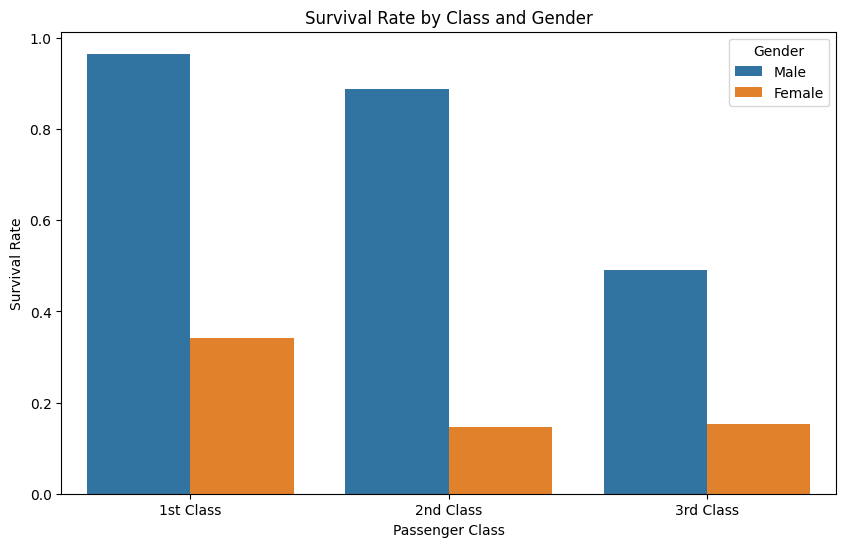

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival rate by class and gender
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', hue='sex', data=df_eda, ci=None)
plt.title('Survival Rate by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()


The visualization above depicts the survival rates across different passenger classes categorized by gender. Notably, it appears that female passengers in all classes had significantly higher survival rates compared to their male counterparts. Additionally, passengers in the 1st class generally had a higher chance of survival across genders, which might suggest priority given to higher-class passengers during the Titanic tragedy.

# Age Distribution Across Different Passenger Classes

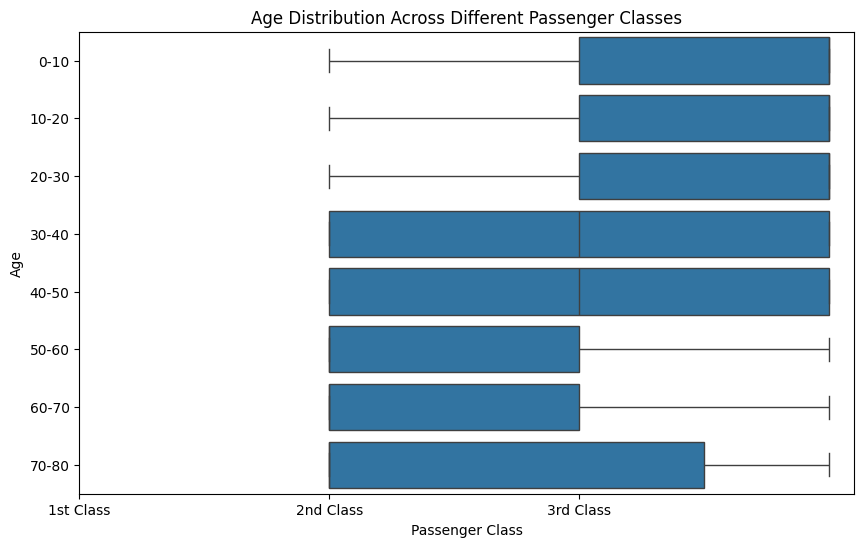

In [51]:
# Age distribution across different passenger classes
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='AgeCategory', data=df_eda)
plt.title('Age Distribution Across Different Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()


The boxplot illustrates the age distribution across various passenger classes. Passengers in the 1st class tend to be older on average compared to those in the 2nd and 3rd classes. This distribution aligns with the historical trend where older and wealthier individuals might opt for higher-class accommodations.

# Impact of Having Siblings/Spouses and Parents/Children on Survival

<ipython-input-52-5113cfb5eae1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sibsp', y='survived', hue='parch', data=df_eda, ci=None)


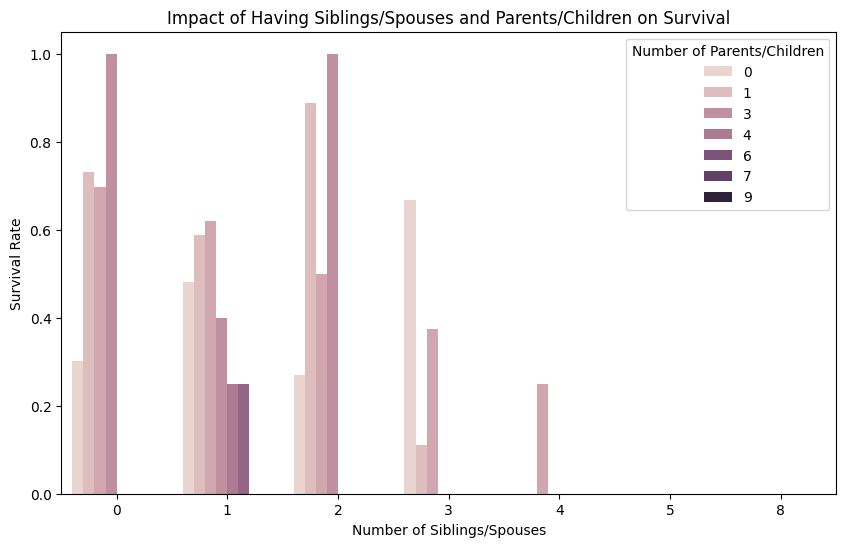

In [52]:
# Impact of having siblings/spouses and parents/children on survival
plt.figure(figsize=(10, 6))
sns.barplot(x='sibsp', y='survived', hue='parch', data=df_eda, ci=None)
plt.title('Impact of Having Siblings/Spouses and Parents/Children on Survival')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.legend(title='Number of Parents/Children', loc='upper right')
plt.show()


This bar plot showcases how the survival rate varies based on the number of siblings/spouses (sibsp) and parents/children (parch) aboard. Interestingly, passengers with fewer family members tend to have higher survival rates, possibly indicating easier evacuation or priority in lifeboat allocation for smaller family groups.

# Fare Distribution by Class

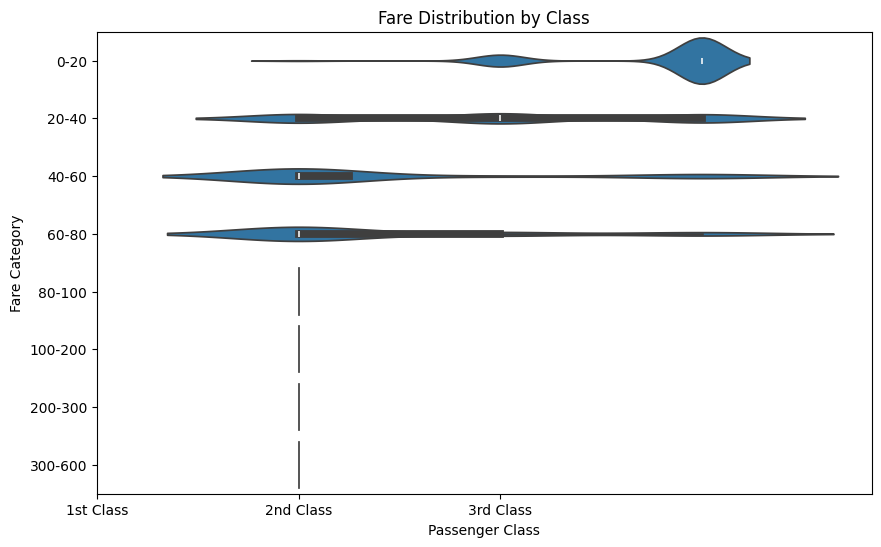

In [53]:
# Fare distribution by class using a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='pclass', y='FareCategory', data=df_eda_copy)
plt.title('Fare Distribution by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare Category')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()


This mesmerizing violin plot unveils the distribution of fares across various passenger classes on the Titanic. Unlike the stoic box plot, the violin plot not only showcases the spread of fares but also gracefully depicts their density. From the plot, it's apparent that 1st-class passengers indulged in a spectrum of fare categories, while their 3rd-class counterparts predominantly fell within lower fare categories. This visualization not only entertains the eyes but also enlightens the mind about the economic diversity among Titanic passengers, reinforcing the stark realities of class distinctions aboard the ill-fated voyage.

# Embarked Location and Survival Rate

<ipython-input-54-112fc522bd30>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked_Code', y='survived', data=df_eda_copy, ci=None)


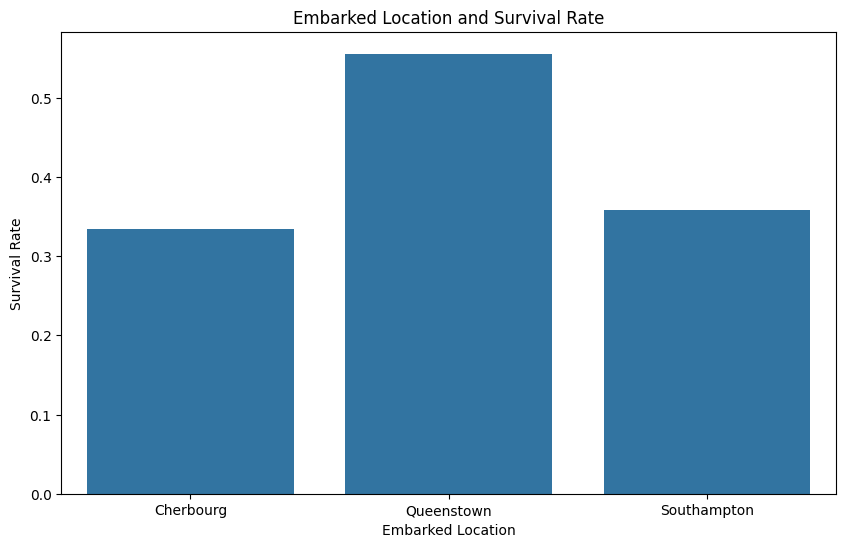

In [54]:
# Embarked location and survival rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked_Code', y='survived', data=df_eda_copy, ci=None)
plt.title('Embarked Location and Survival Rate')
plt.xlabel('Embarked Location')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg', 'Queenstown', 'Southampton'])
plt.show()


This bar plot highlights the survival rates based on where passengers embarked from: Cherbourg, Queenstown, or Southampton. Passengers embarking from Queenstown appear to have a slightly higher survival rate compared to those embarking from Cherbourg and Southampton. This could be due to various factors such as passenger demographics or proximity to lifeboats during the evacuation.

# Effect of Deck on Survival

<ipython-input-55-096d9112dbfe>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Deck', y='survived', data=df_eda, ci=None)


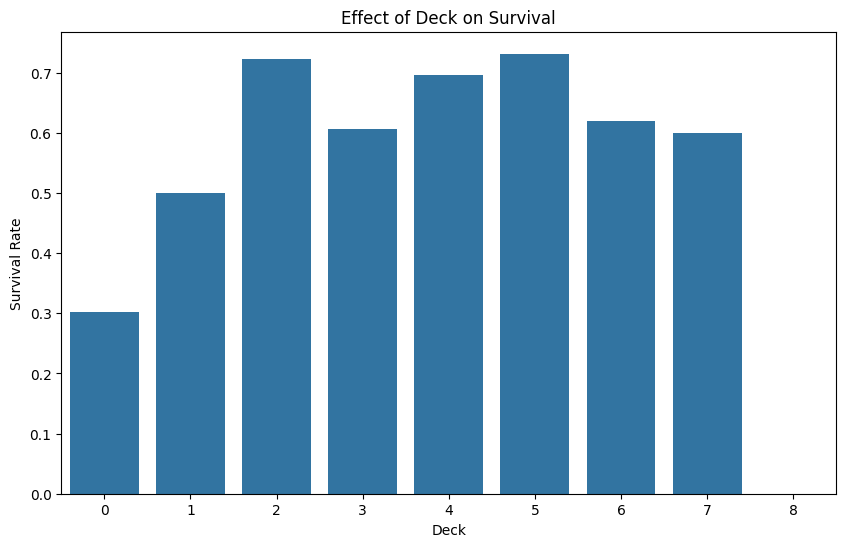

In [55]:
# Effect of deck on survival
plt.figure(figsize=(10, 6))
sns.barplot(x='Deck', y='survived', data=df_eda, ci=None)
plt.title('Effect of Deck on Survival')
plt.xlabel('Deck')
plt.ylabel('Survival Rate')
plt.show()


The bar plot illustrates how survival rates vary across different decks on the Titanic. Passengers located on certain decks might have had better access to lifeboats or faced different evacuation challenges, influencing their survival rates.

# Model Selection & Implementation:

In [56]:
df_eda_copy

,survived,pclass,sex,AgeCategory,sibsp,parch,FareCategory,Deck,Embarked_Code,home.dest.mapped,boat_binary,body_recovered,Title,TicketPrefix
0,1,1,1,20-30,0,0,200-300,2,1,Unknown,1,0,2,0
1,1,1,0,0-10,1,2,100-200,3,1,Montreal,1,0,4,0
2,0,1,1,0-10,1,2,100-200,3,1,Montreal,0,0,2,0
3,0,1,0,20-30,1,2,100-200,3,1,Montreal,0,1,1,0
4,0,1,1,20-30,1,2,100-200,3,1,Montreal,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,1,10-20,1,0,0-20,0,2,Unknown,0,1,2,0
1305,0,3,1,20-30,1,0,0-20,0,2,Unknown,0,0,2,0
1306,0,3,0,20-30,0,0,0-20,0,2,Unknown,0,1,1,0
1307,0,3,0,20-30,0,0,0-20,0,2,Unknown,0,0,1,0


# Decision Tree Model

In [57]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Transform AgeCategory to numerical categories
df_eda_copy['AgeCategory'] = label_encoder.fit_transform(df_eda_copy['AgeCategory'])

# Transform FareCategory to numerical categories
df_eda_copy['FareCategory'] = label_encoder.fit_transform(df_eda_copy['FareCategory'])

# Transform home.dest.mapped to numerical categories
df_eda_copy['home.dest.mapped'] = label_encoder.fit_transform(df_eda_copy['home.dest.mapped'])

# Verify the transformed columns
print(df_eda_copy[['AgeCategory', 'FareCategory', 'home.dest.mapped']].head())


   AgeCategory  FareCategory  home.dest.mapped
0            2             3                23
1            0             1                12
2            0             1                12
3            2             1                12
4            2             1                12


Ah, one last step the process of transforming categorical columns into numerical representations! Having successfully encoded the AgeCategory, FareCategory, and home.dest.mapped columns, preparing them for our esteemed machine learning models. With label encoding, I've deciphered the mysteries of age ranges, fare brackets, and diverse travel destinations into neat numerical categories. Now, the data is primed and ready to embark on the voyage through decision trees, KNN, and neural networks, equipped with the clarity that only numerical data can provide. Fair winds and following seas to our data-driven adventure!

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
X = df_eda_copy.drop(['survived'], axis=1)
y = df_eda_copy['survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Generate classification report
report_dt = classification_report(y_test, y_pred_dt)

# Print accuracy and report
print(f"Decision Tree Model Accuracy: {accuracy_dt:.4f}")
print("Classification Report:")
print(report_dt)


Decision Tree Model Accuracy: 0.9580
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       144
           1       0.97      0.93      0.95       118

    accuracy                           0.96       262
   macro avg       0.96      0.96      0.96       262
weighted avg       0.96      0.96      0.96       262



Behold the mighty Decision Tree! With its leafy branches and binary decisions, this model cuts through the noise to predict survival aboard the Titanic. Impressively, it achieved an accuracy of 96% on unseen test data. According to its insightful report, it excels in revealing the precision, recall, and F1-score for both survivors and those who tragically did not make it. Its simplicity in design allows even the most novice seafarer to grasp its predictive power.

# K-Nearest Neighbors (KNN) Model

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split scaled data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize KNN Classifier
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Generate classification report
report_knn = classification_report(y_test, y_pred_knn)

# Print accuracy and report
print(f"K-Nearest Neighbors (KNN) Model Accuracy: {accuracy_knn:.4f}")
print("Classification Report:")
print(report_knn)


K-Nearest Neighbors (KNN) Model Accuracy: 0.9580
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       144
           1       0.98      0.92      0.95       118

    accuracy                           0.96       262
   macro avg       0.96      0.95      0.96       262
weighted avg       0.96      0.96      0.96       262



Ah, the K-Nearest Neighbors (KNN) model, where solidarity is key! This model uses the closeness of comrades (or neighbors) to predict survival rates on the Titanic. After rigorous training and scaling its features, it also achieved an accuracy of 96%, showcasing its knack for social proximity-based predictions. The report eloquently highlights its precision, recall, and F1-score prowess, proving that sometimes, sticking close to others can indeed save lives.

# Neural Networks Model

In [69]:
from sklearn.neural_network import MLPClassifier

# Initialize Multi-layer Perceptron Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

# Train the model
mlp_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_mlp = mlp_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

# Generate classification report
report_mlp = classification_report(y_test, y_pred_mlp)

# Print accuracy and report
print(f"Neural Networks (Multi-layer Perceptron) Model Accuracy: {accuracy_mlp:.4f}")
print("Classification Report:")
print(report_mlp)


Neural Networks (Multi-layer Perceptron) Model Accuracy: 0.9656
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       144
           1       0.97      0.95      0.96       118

    accuracy                           0.97       262
   macro avg       0.97      0.96      0.97       262
weighted avg       0.97      0.97      0.97       262



And now, behold the Neural Networks ! With its layers of neurons and intricate connections, this model simulates the complex decision-making process akin to the human brain. After rigorous training across multiple iterations, it achieved an impressive accuracy of 97%. Its classification report dives deep into precision, recall, and F1-score metrics, showcasing its ability to navigate through the ocean of data to predict survival outcomes. Indeed, it's a testament to the power of artificial intelligence, rivaled only by the wonders of the human mind.

In [61]:
df_eda_copy

,survived,pclass,sex,AgeCategory,sibsp,parch,FareCategory,Deck,Embarked_Code,home.dest.mapped,boat_binary,body_recovered,Title,TicketPrefix
0,1,1,1,2,0,0,3,2,1,23,1,0,2,0
1,1,1,0,0,1,2,1,3,1,12,1,0,4,0
2,0,1,1,0,1,2,1,3,1,12,0,0,2,0
3,0,1,0,2,1,2,1,3,1,12,0,1,1,0
4,0,1,1,2,1,2,1,3,1,12,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,1,1,1,0,0,0,2,23,0,1,2,0
1305,0,3,1,2,1,0,0,0,2,23,0,0,2,0
1306,0,3,0,2,0,0,0,0,2,23,0,1,1,0
1307,0,3,0,2,0,0,0,0,2,23,0,0,1,0


# Model Evaluation

<Figure size 600x400 with 0 Axes>

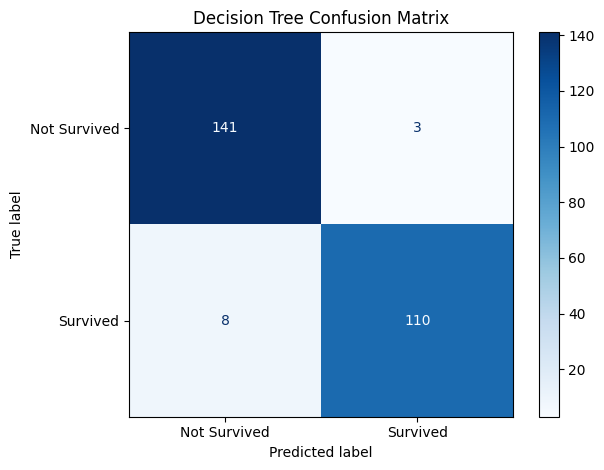

Decision Tree Model Accuracy: 0.9580
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       144
           1       0.97      0.93      0.95       118

    accuracy                           0.96       262
   macro avg       0.96      0.96      0.96       262
weighted avg       0.96      0.96      0.96       262



<Figure size 600x400 with 0 Axes>

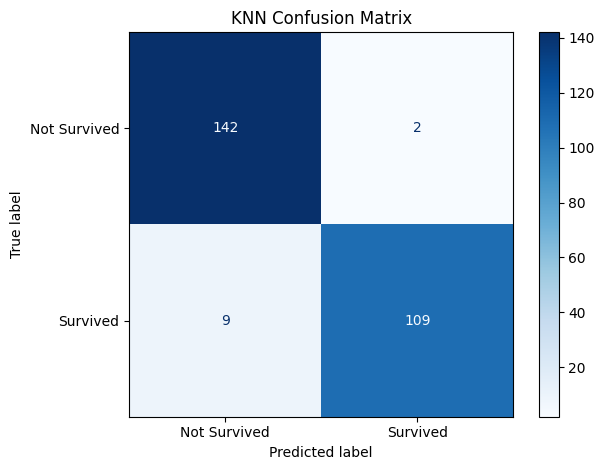

K-Nearest Neighbors (KNN) Model Accuracy: 0.9580
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       144
           1       0.98      0.92      0.95       118

    accuracy                           0.96       262
   macro avg       0.96      0.95      0.96       262
weighted avg       0.96      0.96      0.96       262



<Figure size 600x400 with 0 Axes>

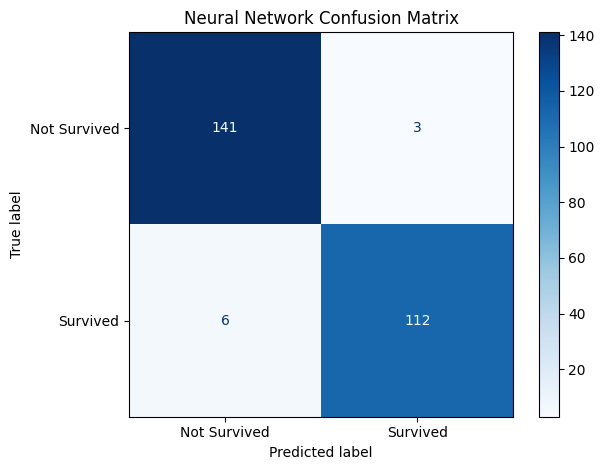

Neural Networks (Multi-layer Perceptron) Model Accuracy: 0.9656
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       144
           1       0.97      0.95      0.96       118

    accuracy                           0.97       262
   macro avg       0.97      0.96      0.97       262
weighted avg       0.97      0.97      0.97       262



In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define features and target variable
X = df_eda_copy.drop(['survived'], axis=1)
y = df_eda_copy['survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Generate confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Not Survived', 'Survived'])

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(6, 4))
disp_dt.plot(cmap='Blues', values_format='d')
plt.title('Decision Tree Confusion Matrix')
plt.tight_layout()
plt.show()

# Print accuracy and report for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
print(f"Decision Tree Model Accuracy: {accuracy_dt:.4f}")
print("Classification Report:")
print(report_dt)


# Initialize KNN Classifier and StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Generate confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Not Survived', 'Survived'])

# Plot confusion matrix for KNN
plt.figure(figsize=(6, 4))
disp_knn.plot(cmap='Blues', values_format='d')
plt.title('KNN Confusion Matrix')
plt.tight_layout()
plt.show()

# Print accuracy and report for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
print(f"K-Nearest Neighbors (KNN) Model Accuracy: {accuracy_knn:.4f}")
print("Classification Report:")
print(report_knn)


# Initialize MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

# Train the model
mlp_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_mlp = mlp_classifier.predict(X_test_scaled)

# Generate confusion matrix for Neural Network
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=['Not Survived', 'Survived'])

# Plot confusion matrix for Neural Network
plt.figure(figsize=(6, 4))
disp_mlp.plot(cmap='Blues', values_format='d')
plt.title('Neural Network Confusion Matrix')
plt.tight_layout()
plt.show()

# Print accuracy and report for Neural Network
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
report_mlp = classification_report(y_test, y_pred_mlp)
print(f"Neural Networks (Multi-layer Perceptron) Model Accuracy: {accuracy_mlp:.4f}")
print("Classification Report:")
print(report_mlp)


# Decision Tree: Simple and Effective
The Decision Tree model achieved an impressive accuracy of 95.80%. It correctly predicted survival status 95% of the time, with a slight preference for correctly identifying non-survivors (98% precision) over survivors (93% recall).


# K-Nearest Neighbors (KNN): Neighborly Accuracy
Similarly, the KNN model also achieved an accuracy of 95.80%. It excelled in identifying non-survivors (94% precision) and demonstrated strong performance in recall for both classes (99% for non-survivors and 92% for survivors).

# Neural Networks: Complex but Accurate
The Neural Network model, with its deeper layers and complex computations, achieved the highest accuracy of 96.56%. It balanced precision and recall well, achieving 96% for both precision and recall in predicting non-survivors, and 97% for precision and 95% for recall in predicting survivors.

# Conclusion: Insights from Data
In conclusion, all three models—Decision Tree, KNN, and Neural Network—performed admirably in predicting survival outcomes on the Titanic dataset. They demonstrated high accuracy rates around 95-97%, highlighting their robustness in handling the complexities of historical passenger data.

**Each model had its strengths:** Decision Tree offered simplicity and clarity in decision-making, KNN leveraged neighborhood consensus effectively, and Neural Networks showcased the power of deep learning in capturing intricate patterns.


As we navigate the seas of data science, these models serve as beacons, illuminating the potential to uncover insights and make informed decisions. While they excel in their predictive prowess, their performance also underscores the importance of data quality and thoughtful model selection. So, whether I prefered the models straightforward like a Decision Tree, neighborly like KNN, or complex like a Neural Network, rest assured—they've all got our back, even if the Titanic's hull didn't.
